This notebook compares the different collaborative filtering approaches — item-item based vs user-user based and four similarities option.

In [5]:
from surprise import SVD, SVDpp
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBasic, KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [6]:
import time
import pandas as pd

In [7]:
def convert_traintest_dataframe_forsurprise(training_dataframe, testing_dataframe):
    reader = Reader(rating_scale=(0, 5))
    trainset = Dataset.load_from_df(training_dataframe[['userId', 'tmdbId', 'rating']], reader)
    testset = Dataset.load_from_df(testing_dataframe[['userId', 'tmdbId', 'rating']], reader)
    trainset = trainset.construct_trainset(trainset.raw_ratings)
    testset = testset.construct_testset(testset.raw_ratings)
    return trainset, testset

In [8]:
file_path_train = '../0_data/processed/training_data.csv'
file_path_test = '../0_data/processed/testing_data.csv'
traindf = pd.read_csv(file_path_train)
testdf = pd.read_csv(file_path_test)
trainset, testset = convert_traintest_dataframe_forsurprise(traindf, testdf)

In [9]:
def recommendation(algo, trainset, testset):
  # Train the algorithm on the trainset, and predict ratings for the testset
  algo.fit(trainset)
  predictions = algo.test(testset)

  # Then compute RMSE
  accuracy.rmse(predictions)
  # Then compute MAE
  accuracy.mae(predictions)
  return

Comparison between 4 similarities

Cosine

In [10]:
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9271
MAE:  0.7085
Done!


In [11]:
sim_options = {'name': 'cosine'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9185
MAE:  0.7030


MSD

In [12]:
sim_options = {'name': 'msd',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9130
MAE:  0.6979
Done!


In [13]:
sim_options = {'name': 'msd'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9146
MAE:  0.6987


Pearson

In [14]:
sim_options = {'name': 'pearson',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9241
MAE:  0.7010
Done!


In [15]:
sim_options = {'name': 'pearson'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9207
MAE:  0.7012


Pearson Baseline

In [16]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9051
MAE:  0.6857
Done!


In [17]:
sim_options = {'name': 'pearson_baseline'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9180
MAE:  0.6956


In [18]:
import matplotlib.pyplot as plt


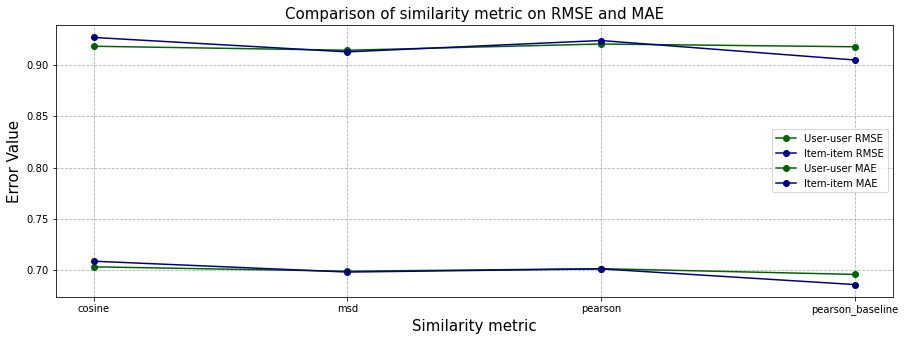

In [20]:
x_algo = ['cosine', 'msd', 'pearson', 'pearson_baseline']

item_rmse = [0.9271, 0.9130, 0.9241, 0.9051]
item_mae  = [0.7085, 0.6979, 0.7010, 0.6857]
user_rmse = [0.9185, 0.9146, 0.9207, 0.9180]
user_mae  = [0.7030, 0.6987, 0.7012, 0.6956]

plt.figure(figsize=(15,5))

# plt.subplot(1, 2, 1)
plt.title('Comparison of similarity metric on RMSE and MAE', loc='center', fontsize=15)
plt.plot(x_algo, user_rmse, label='User-user RMSE', color='darkgreen', marker='o')
plt.plot(x_algo, item_rmse, label='Item-item RMSE', color='navy', marker='o')
plt.xlabel('Similarity metric', fontsize=15)
plt.ylabel('Error Value', fontsize=15)
# plt.legend()
# plt.grid(ls='dashed')
# plt.show()

# plt.subplot(1, 2, 1)
# plt.figure(figsize=(15,5))
# plt.title('Comparison of similarity metric on MAE', loc='center', fontsize=15)
plt.plot(x_algo, user_mae, label='User-user MAE', color='darkgreen', marker='o')
plt.plot(x_algo, item_mae, label='Item-item MAE', color='navy', marker='o')
# plt.xlabel('Similarity metric', fontsize=15)
# plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()